In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import urllib.request
import cv2

In [3]:
img_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/bunny.png"
urllib.request.urlretrieve(img_url, "bunny.jpg")

('bunny.jpg', <http.client.HTTPMessage at 0x7f4aca9a8bd0>)

In [4]:
os.listdir(os.curdir)

['image_Compressed using K means clustering.ipynb',
 'Image_processing with OpenCV.ipynb',
 'Untitled.ipynb',
 'bunny.jpg',
 'pm.jpg',
 '.ipynb_checkpoints',
 'compressed_bunny.jpg']

In [5]:
img_data = cv2.imread("bunny.jpg")

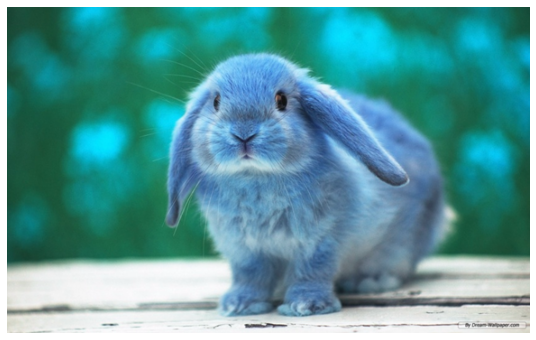

In [6]:
from pylab import rcParams

rcParams['figure.figsize'] = 10,6
plt.axis('off')
plt.imshow(img_data)

Original size of bunny is 630.0 kilo bytes


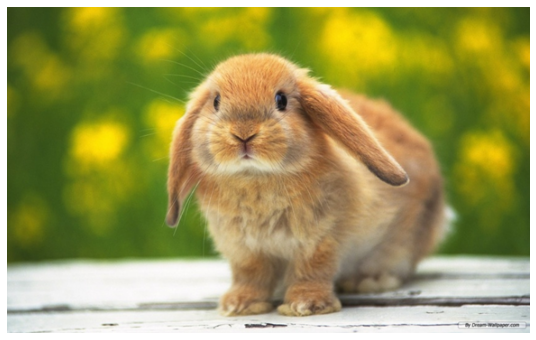

In [7]:
img_correct = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

rcParams['figure.figsize'] = 10, 6
plt.axis('off')
plt.imshow(img_correct)
print("Original size of bunny is {} kilo bytes".format(str(np.ceil(os.stat('bunny.jpg').st_size/1000))))

In [8]:
img_data.shape

(362, 580, 3)

In [9]:
from sklearn.cluster import KMeans

In [10]:
row = img_data.shape[0]
col = img_data.shape[1]

cluster_img_data = img_data.reshape(row * col, 3)

In [11]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(cluster_img_data)

KMeans()

In [12]:
cluster_centroid = np.asarray(kmeans.cluster_centers_, dtype= np.uint8)

labels = np.asarray(kmeans.labels_, dtype= np.uint8)
labels = labels.reshape(row, col)

In [13]:
compressed_img = np.ones((row, col, 3), dtype=np.uint8)

for r in range(row):
    for c in range(col):
        compressed_img[r, c, :] = cluster_centroid[labels[r,c], :]

Compressed image size is 76.0 kilo bytes


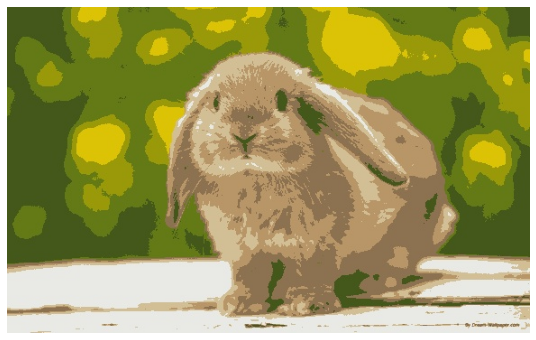

In [14]:
cv2.imwrite("compressed_bunny.jpg", compressed_img)
compresed_bunny_img = cv2.imread("compressed_bunny.jpg")

output_img = cv2.cvtColor(compresed_bunny_img, cv2.COLOR_BGR2RGB)
rcParams['figure.figsize'] = 10, 6
plt.axis('off')
plt.imshow(output_img)

print("Compressed image size is {} kilo bytes".format(str(np.ceil(os.stat('compressed_bunny.jpg').st_size/1000))))

bunny image is compressed from 630 kb to 76 kb successfully !!